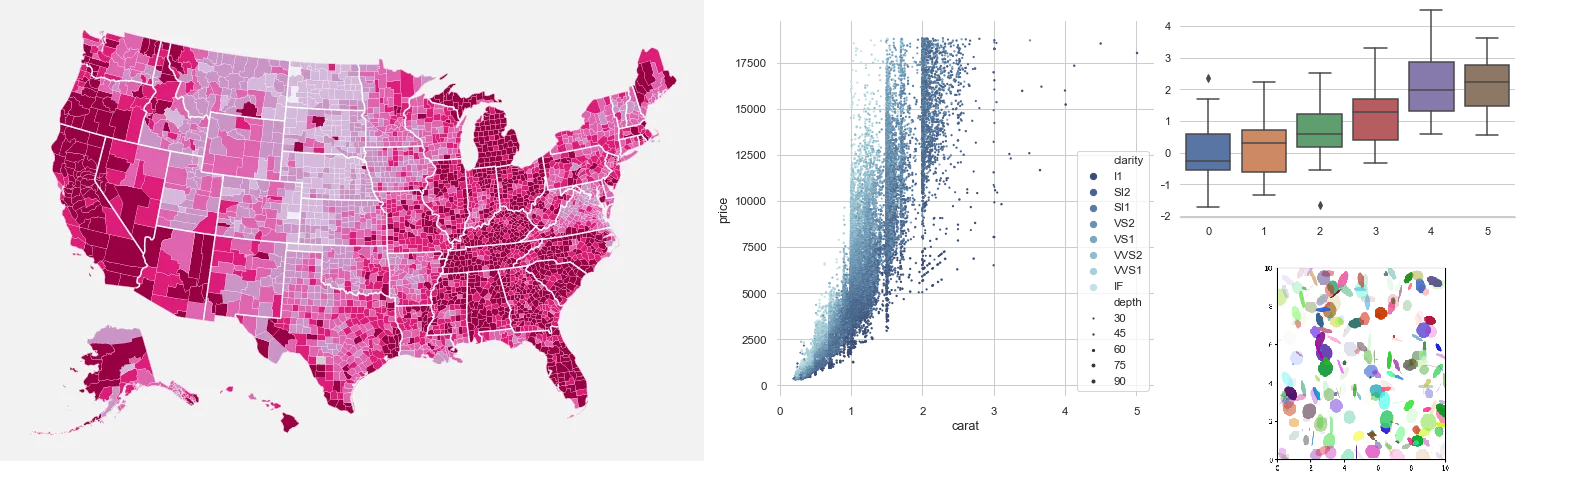

<a id='section_id0'></a>
# BMIS2542-Data Programming Essentials *with Python*
##### Katz Graduate School of Business
## Session 4: Exploring Data

<font color="#740202">**Table of contents:**

|No.|Topic||No.|Topic||No.|Topic|
|:------|:------||:------|:------||:------|:------|
|1.|[Plotting Libraries](#section_id1)||2.|[Load and Check Data](#section_id2)||3.|[Data Distribution](#section_id3)  |
|4.|[Relating Variables](#section_id4)  ||5.|[Categories](#section_id5)  ||6.|[Trending/Smoothing Functions](#section_id6)  |
|7.|[Multi-plot Grids](#section_id7)  ||8.|[Choropleth Maps](#section_id8)||9.|[References](#section_id9)|

***

<font color="#740202">**List of Session-5 Exercises:**</font>

(1) [Importing and checking data](#section_id-ex1), (2) [Anscombe's quartet](#section_id-ex2), (3) [Choropleth map](#section_id-ex3)
***

<a id='section_id1'></a>
### <span style="background-color:#B0E0E6">Plotting libraries</span>
* We'll use the [Matplotlib](https://matplotlib.org/, [Seaborn library](https://seaborn.pydata.org/tutorial.html), and [Folium (for maps)](https://python-visualization.github.io/folium/). These are easy entry points and are very popular packages.
* Check out these cheat sheets:
    * [Data visualization with Seaborn](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)
    * [Plotting with Matplotlib](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
    * [Interactive maps with Folium](https://andrewchallis.co.uk/wp-content/uploads/2017/12/Folium.pdf)

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Read the [Seaborn documentation about color codes](https://seaborn.pydata.org/generated/seaborn.set_color_codes.html)
* [Check out how to control figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)

In [2]:
sns.set(color_codes=True)

In [3]:
sns.set(style="darkgrid")
#sns.set_style("whitegrid")
#sns.set_style("dark")
#sns.set_style("white")

<a id='section_id2'></a>
### <span style="background-color:#B0E0E6">Data check</span>

In [4]:
tips = pd.read_csv('tipsdata.csv')

In [5]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

#### Check for missing values

In [6]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

#### Check summary statistics

In [7]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
tips.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,87,87,87,87,87,87
Male,157,157,157,157,157,157


<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

***
<a id='section_id-ex1'></a>
### <span style="background-color:#CCFFCC">Class Exercise-1: Anscombe setup</span>
* Create a new Jupyter notebook. Name it "Session4_Exercises," and do the usual formatting (name, email information, etc.)
* Insert a new markdown cell in the notebook and type in the header "Exercise-1".
* Use the `anscombe.csv` file for this exercise. 
* Import the dataset as a pandas dataframe and check it out (shape, info, summary stats, etc.)
***
<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id3'></a>
### <span style="background-color:#B0E0E6">Visualizing the distribution of a dataset</span>

In [9]:
sns.set(color_codes=True)
sns.set(style="darkgrid")
#sns.set_style("whitegrid")
#sns.set_style("dark")
#sns.set_style("white")

Plotting directly with Pandas and Matplotlib

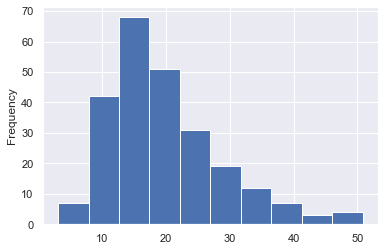

In [10]:
tips['total_bill'].plot.hist(bins=10)

Now, with Seaborn

Z:\Software-on-Akash\Anaconda\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


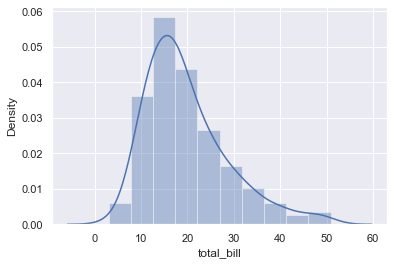

In [11]:
sns.distplot(tips['total_bill'], bins=10, kde=True, rug=False, hist=True)

Z:\Software-on-Akash\Anaconda\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Z:\Software-on-Akash\Anaconda\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


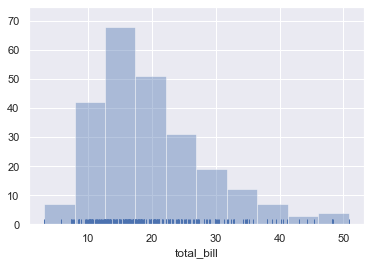

In [12]:
sns.distplot(tips['total_bill'], bins=10, kde=False, rug=True, hist=True)

Z:\Software-on-Akash\Anaconda\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Z:\Software-on-Akash\Anaconda\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


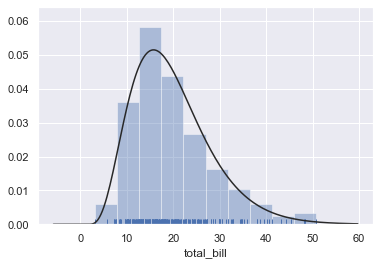

In [13]:
sns.distplot(tips['total_bill'], bins=10, kde=False, rug=True, hist=True, fit=stats.gamma)

Learn about the [many types of distributions](https://docs.scipy.org/doc/scipy/reference/stats.html) supported by SciPy Stats.

#### Figure Size
There are a few ways to alter figure sizes:
* For some figures, you can use the "figdims" parameter of matplotlib as shown in the example below
* For other figures, you'll have to set specific parameters such as aspect ratio, height, and width -- there are examples further below in the notebook on this setting.

Z:\Software-on-Akash\Anaconda\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


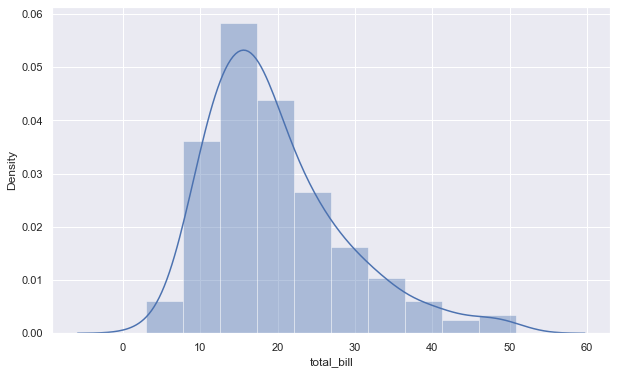

In [14]:
#bigger figure
figdims=(10, 6) #size in inches
fig, ax = plt.subplots(figsize=figdims)
sns.distplot(tips['total_bill'], bins=10, kde=True, rug=False, hist=True)

#### Saving Figure
There are a few ways to save figures generated from matplotlib or seaborn libraries.
* In Jupyter, you can save figures by right clicking and then saving them as you would do in a webpage/browser.
* You can use the inbuilt attirbute "savefig" from matplotlib.

Z:\Software-on-Akash\Anaconda\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


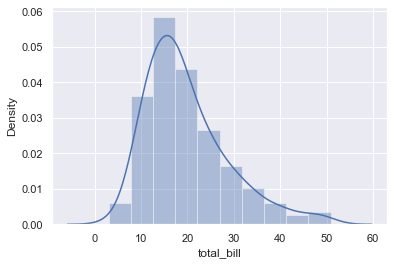

In [15]:
sns.distplot(tips['total_bill'], bins=10, kde=True, rug=False, hist=True)
plt.savefig("figure1.png") #the figure is stored in your working directory

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id4'></a>
### <span style="background-color:#B0E0E6">Relating variables</span>

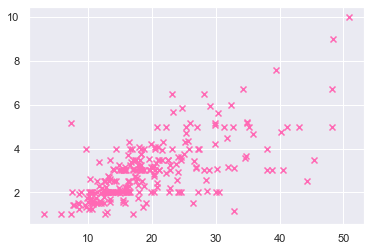

In [16]:
plt.scatter(x='total_bill', y='tip', data=tips, color = 'hotpink', marker='x')

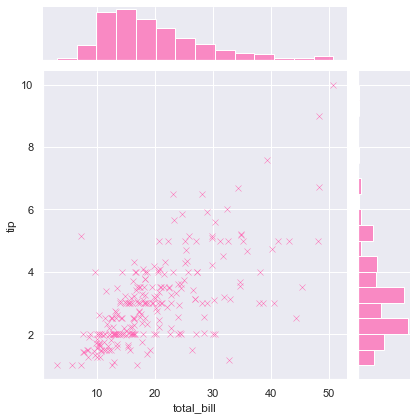

In [17]:
sns.jointplot(x='total_bill', y='tip', data=tips, color = 'hotpink', marker='x')

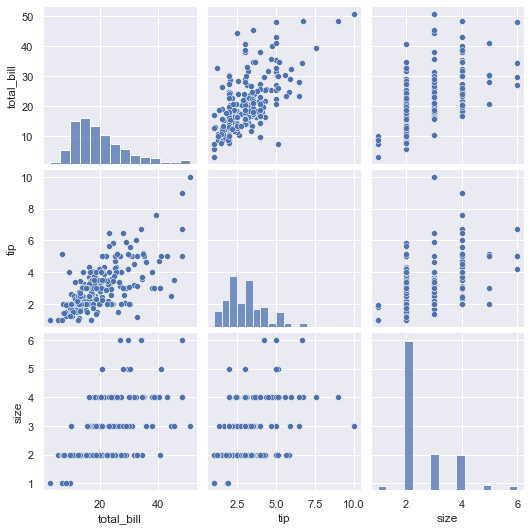

In [18]:
sns.pairplot(tips)

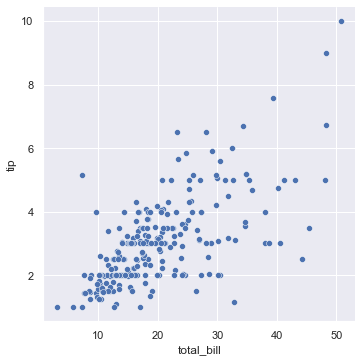

In [19]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter")

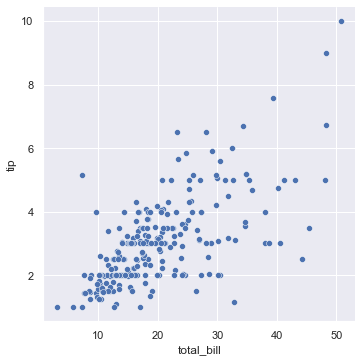

In [20]:
plot1=sns.relplot(x="total_bill", y="tip", data=tips)

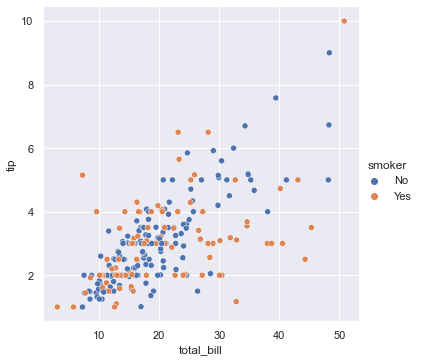

In [21]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

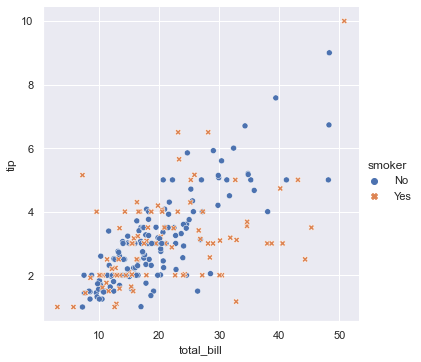

In [22]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",data=tips)

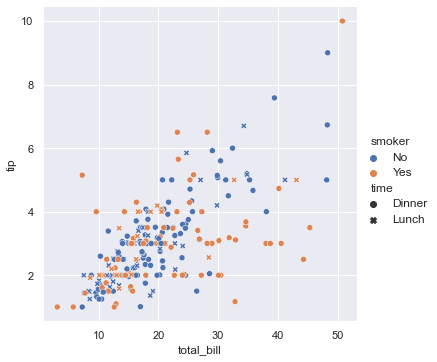

In [23]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)

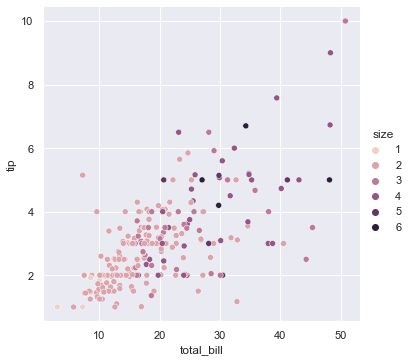

In [24]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)

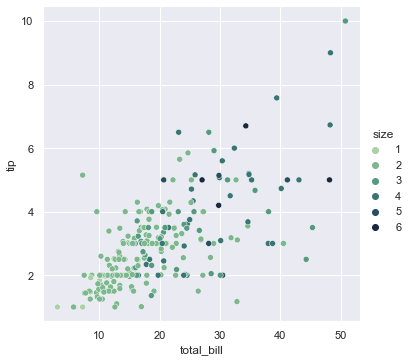

In [25]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips)

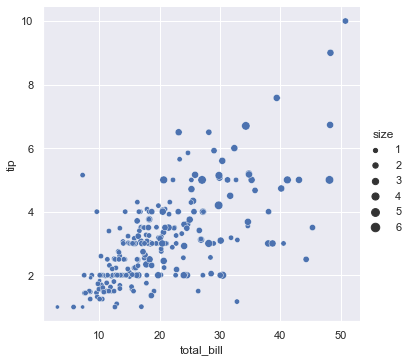

In [26]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips)

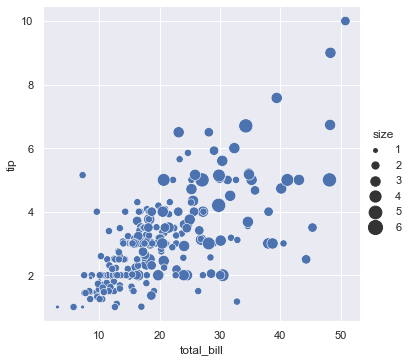

In [27]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips)

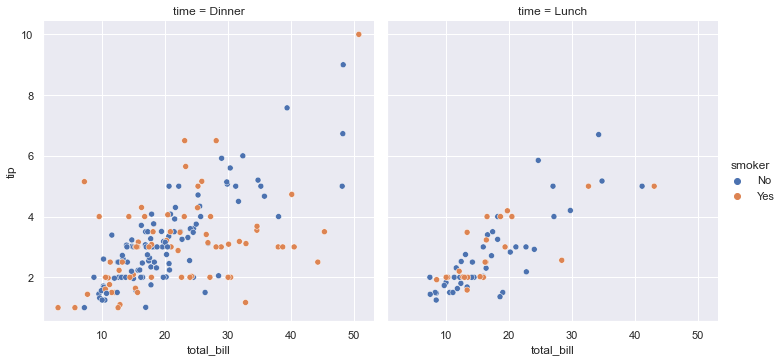

In [28]:
sns.relplot(x="total_bill", y="tip", hue="smoker",col="time", data=tips)

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id5'></a>
### <span style="background-color:#B0E0E6">Categories</span>

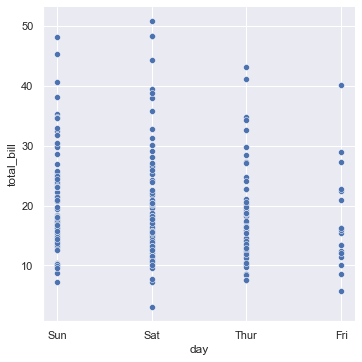

In [29]:
sns.relplot(x="day", y="total_bill", data=tips)

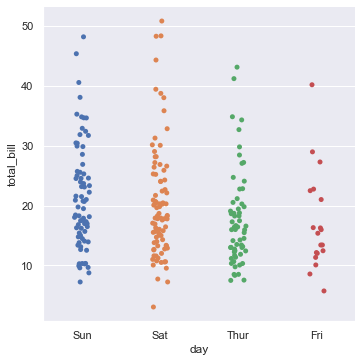

In [30]:
sns.catplot(x="day", y="total_bill", data=tips, jitter=True)

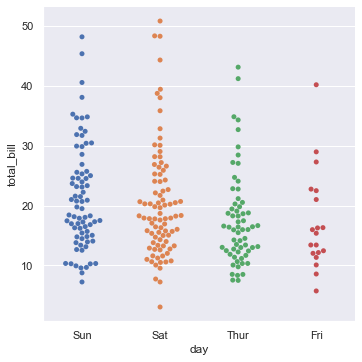

In [31]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

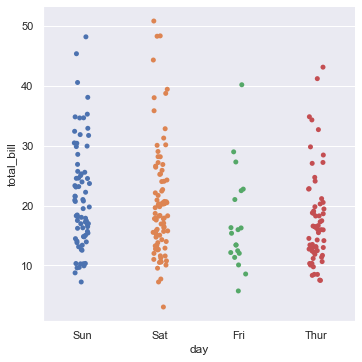

In [32]:
sns.catplot(x="day", y="total_bill", order=["Sun", "Sat", "Fri", "Thur"], data=tips)

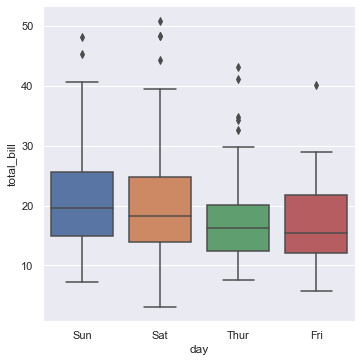

In [33]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

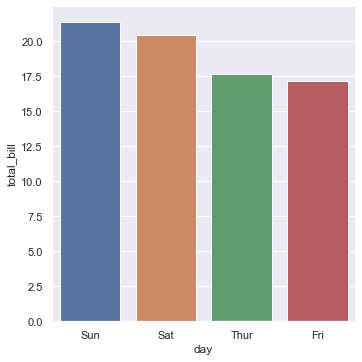

In [34]:
sns.catplot(x="day", y="total_bill", kind="bar", data=tips, ci=None)

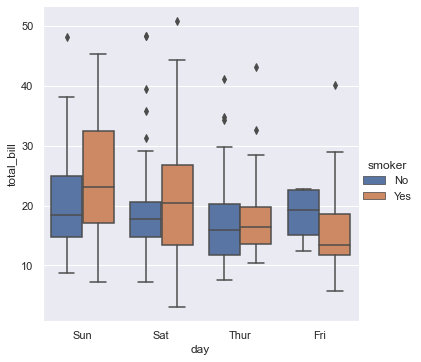

In [35]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips, dodge=True)

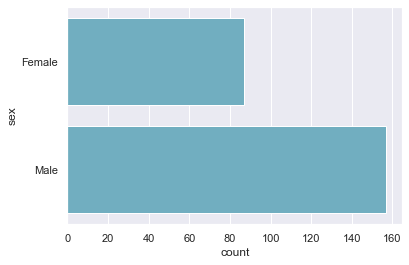

In [36]:
sns.countplot(y="sex", data=tips, color="c")

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id6'></a>
### <span style="background-color:#B0E0E6">Trending/Smoothing Functions</span>

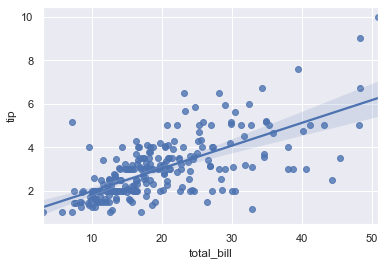

In [37]:
sns.regplot(x="total_bill", y="tip", data=tips)

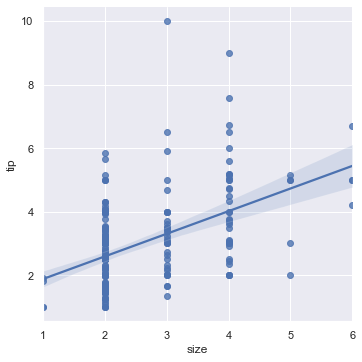

In [38]:
sns.lmplot(x="size", y="tip", data=tips)

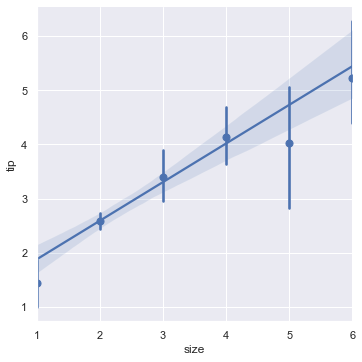

In [39]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

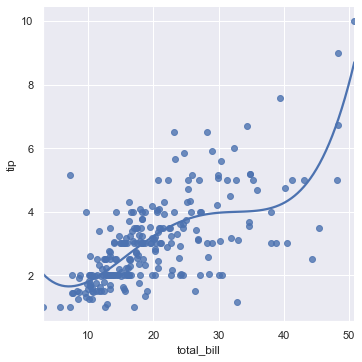

In [40]:
sns.lmplot(x="total_bill", y="tip", data=tips, order=4, ci=None)

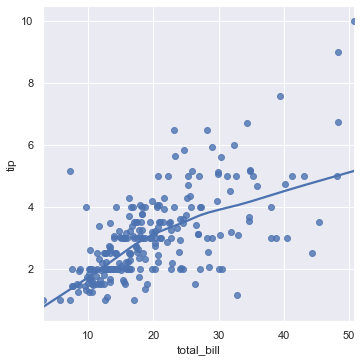

In [41]:
sns.lmplot(x="total_bill", y="tip", data=tips,lowess=True)

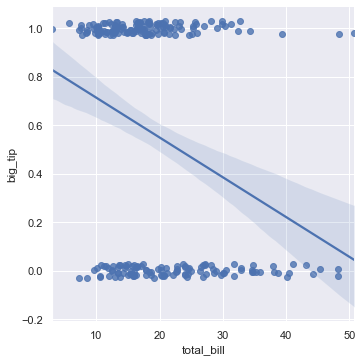

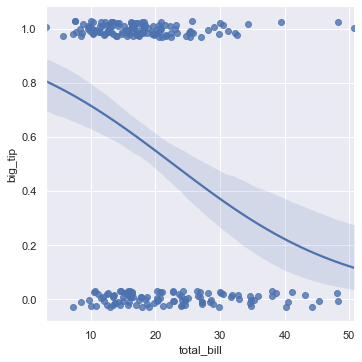

In [42]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03)
sns.lmplot(x="total_bill", y="big_tip", data=tips, logistic=True, y_jitter=.03)

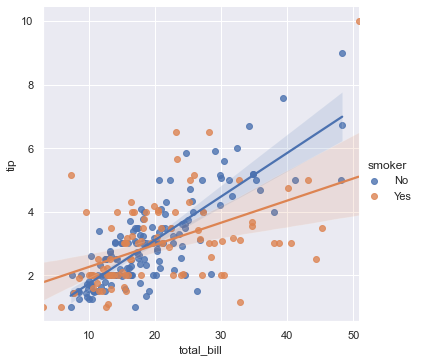

In [43]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

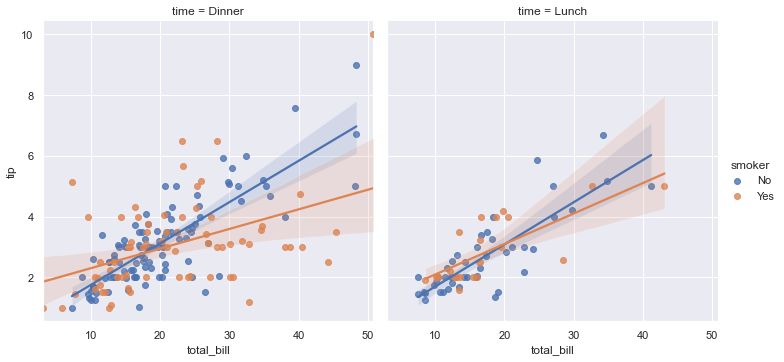

In [44]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

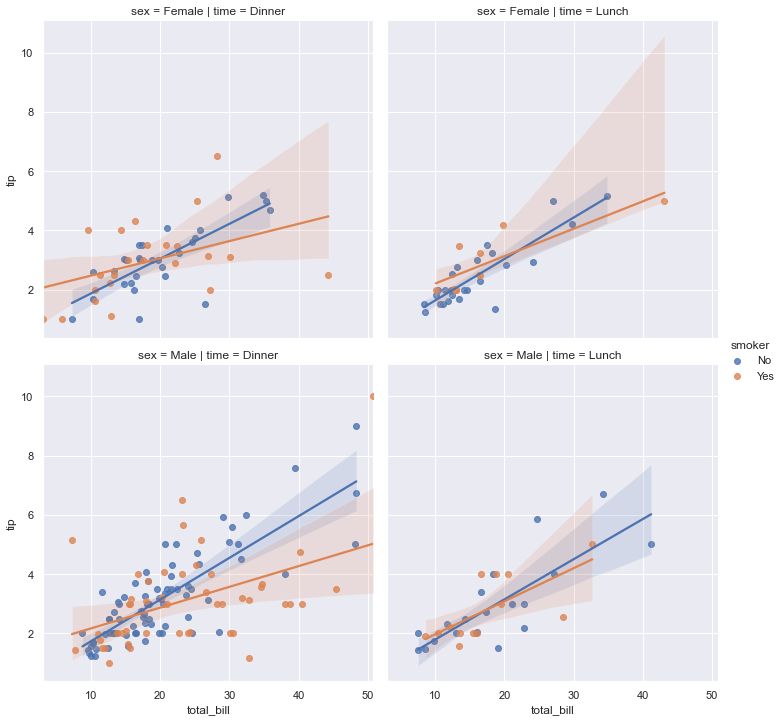

In [45]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",col="time", row="sex", data=tips)

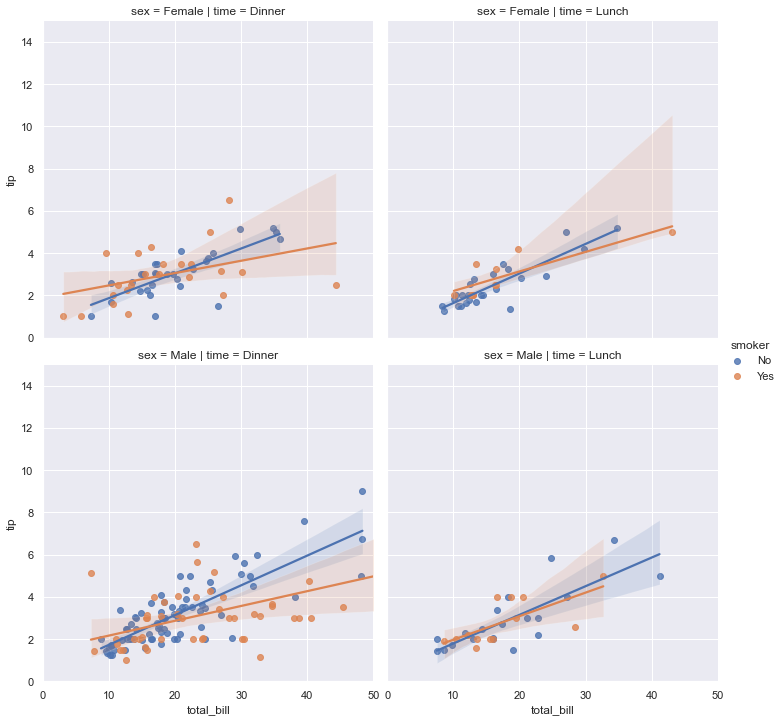

In [46]:
g=sns.lmplot(x="total_bill", y="tip", hue="smoker",col="time", row="sex", data=tips)
g.set(xlim=(0, 50), ylim=(0, 15))

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id7'></a>
### <span style="background-color:#B0E0E6">More multi-plot grids</span>

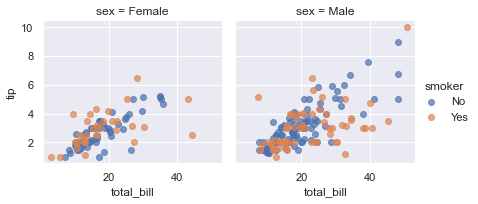

In [47]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend()

Z:\Software-on-Akash\Anaconda\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


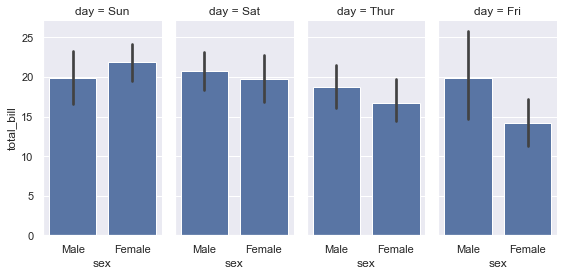

In [48]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5 )
g.map(sns.barplot, "sex", "total_bill", ci=95)

Z:\Software-on-Akash\Anaconda\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Z:\Software-on-Akash\Anaconda\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
Z:\Software-on-Akash\Anaconda\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Z:\Software

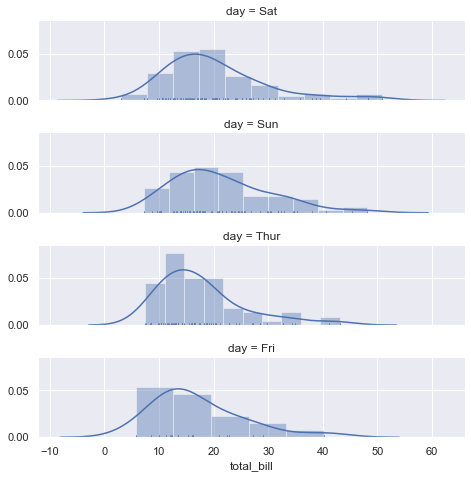

In [49]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days, height=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=True, rug=True)

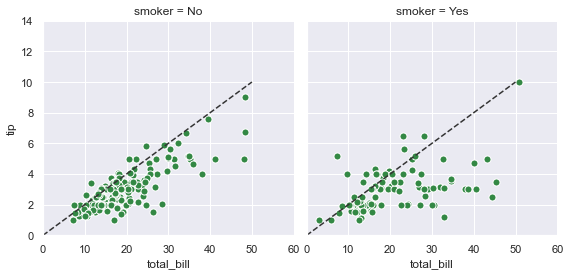

In [50]:
#lot of customizations possible:
g= sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14))

In the above figure, the explanation for parameters are:
* s -- refers to the size of the scatter plot dots
* the hexcode for color is the html color code for the green shade
* edgecolor & lw refer to the border of the scatter dots
* For the line:
    * ls refers to the [line style](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle)
    * c refers to [line color](https://matplotlib.org/3.1.1/api/colors_api.html)

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

***
<a id='section_id-ex2'></a>
### <span style="background-color:#CCFFCC">Class Exercise-2: Anscombe visualization</span>
* Insert a new markdown cell in the notebook and type in the header "Exercise-2".
* Continue with the `anscombe` data for this exercise. 
* Create 4 scatter plots with each showing a plot of $y_i$ and $x_i$ for $i$=1,2,3,4. 
* Try out the other plots with the same data: distplot, relplot, regplot, pairplot, and boxplot. 
***
<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id8'></a>
### <span style="background-color:#B0E0E6">Choropleth Maps</span>
* You can install the Folium package by executing this in a code cell:<Mark> ! pip install folium </Mark>
    * [pip](https://en.wikipedia.org/wiki/Pip_(package_manager)) is a "package manager" that helps install any package found in the [Python Package Index](https://pypi.org/)
* See the [quick start examples](https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps) in the Folium documentation.
* Checkout the [Folium GitHub page](https://github.com/python-visualization/folium)

In [51]:
# Uncomment (remove the #) and run to install Folium
#!pip install folium

In [52]:
import folium

**Example 1: US States Map.** For this example, we'll read data from the Folium package's GitHub repository:

In [53]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json' # for US map with state boundaries
world_geo = f'{url}/world-countries.json' # for world map with country boundaries
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'

<Mark>Note:</Mark>I used the Python f-string feature in the above cell. An f-string is a literal string, prefixed with 'f', which contains expressions inside braces. The expressions are replaced with their values during run time. Thus, an f-string is really an expression evaluated at run time, not a constant value.

In [54]:
state_data = pd.read_csv(state_unemployment)

In [55]:
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [56]:
map1 = folium.Map(location=[48, -102], zoom_start=3)

In [57]:
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(map1)

In [58]:
folium.LayerControl().add_to(map1)

In [59]:
map1

You can breakdown the map at the county level as well. Check out the [examples in the Folium documentation](https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps).

**Example 2: World countries.** We'll use a dataset from the World Bank for this example. 

In [60]:
# Read in the country-level data posted on Canvas
world_data = pd.read_csv('worlddata.csv')

In [61]:
world_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


We'll use the "life expectancy at birth, female (years)" data of 2013 for our exploration

In [62]:
wdiselect = world_data[(world_data['IndicatorName']=="Life expectancy at birth, female (years)") \
                       & (world_data['Year']==2013)]
wdiselect.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5377669,Arab World,ARB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2013,72.536117
5378129,Caribbean small states,CSS,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2013,74.757382
5378636,Central Europe and the Baltics,CEB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2013,79.973818
5379151,East Asia & Pacific (all income levels),EAS,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2013,76.524546
5379759,East Asia & Pacific (developing only),EAP,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2013,75.466062


In [63]:
data_to_plot = wdiselect[['CountryCode','Value']]
data_to_plot.head()

,CountryCode,Value
5377669,ARB,72.536117
5378129,CSS,74.757382
5378636,CEB,79.973818
5379151,EAS,76.524546
5379759,EAP,75.466062


In [64]:
map2 = folium.Map(location=[40, 0], zoom_start=1.5)

In [65]:
# choropleth maps bind Pandas Data Frames and json geometries.
folium.Choropleth(geo_data=world_geo, data=data_to_plot,
             name='choropleth',
             columns=['CountryCode', 'Value'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Life expectancy at birth for females in years').add_to(map2)
folium.LayerControl().add_to(map2)

In [66]:
map2

Saving the map into present working directory as a html file:

In [67]:
map2.save('female_life.html')

Loading a saved html file into Jupyter:

In [68]:
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=female_life.html width=700 height=450></iframe>')

Z:\Software-on-Akash\Anaconda\Anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


***
<a id='section_id-ex3'></a>
### <span style="background-color:#CCFFCC">Class Exercise-3: Choropleth maps</span>
* Insert a new markdown cell in the notebook and type in the header "Exercise-2".
* Continue with the `worlddata` example we used above for this exercise. 
* Pick any variable of your choice and develop a choropleth map (similar to the female life expectancy at birth example).
***
<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<Mark>**Next Steps:**</Mark>

* Complete all the exercises listed in this notebook.
* Get started with Assignment-2 on data visualization.
* Use the resources listed in the references for additional practice.
***
<font color="#740202">**List of Session-5 Exercises:**</font>

(1) [Importing and checking data](#section_id-ex1), (2) [Anscombe's quartet](#section_id-ex2), (3) [Choropleth map](#section_id-ex3)
***

<a id='section_id9'></a>
### <span style="background-color:#B0E0E6">References</span>

* The [examples](https://matplotlib.org/stable/gallery/index.html) and [tutorials](https://matplotlib.org/stable/tutorials/index.html) of matplotlib package.
* The [example gallery](https://seaborn.pydata.org/examples/index.html) and [the tutorial materials](https://seaborn.pydata.org/tutorial.html) offerred by the seaborn package.
* Gallery of [notebooks with Folium examples](https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/), and other community examples:
    * [plotting crime in San Francisco](https://codeburst.io/how-i-understood-displaying-interactive-maps-using-python-leaflet-js-and-folium-bd9b98c26e0e)
    * Three part series on visualizing bikeshare data in New York city: (1) creating an [interactive plot](https://blog.prototypr.io/interactive-maps-with-python-part-1-aa1563dbe5a9), [customizing it with glow effects](https://blog.prototypr.io/interactive-maps-in-python-part-2-4943c4cb0ee4), and [animating the map](https://blog.prototypr.io/interactive-maps-in-python-part-3-29f14a9b2f7d).

<font color="#610B21"><center>\~\~ End of Session-5. We'll start with modeling concepts in Session-6\~\~ </center>
<font color="#0B610B"><center>\*\* **Good luck with Assignments 2!**\*\* </center>
***

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>